In [1]:
import pandas as pd
import numpy as np
import data_sanitizer
import matplotlib.pyplot as plt

dataSet = pd.read_csv('../netflix_titles.csv')

In [2]:
# Copy listed_in column into it's own dataframe, split each genre into it's own columns and rename the columns
genres = dataSet['listed_in'].str.split(', ', expand=True)
genres.rename(columns = {0: 'genre1', 1: 'genre2', 2: 'genre3'}, inplace = True)
genres

,genre1,genre2,genre3
0,Children & Family Movies,Comedies,None
1,Stand-Up Comedy,None,None
2,Kids' TV,None,None
3,Kids' TV,None,None
4,Comedies,None,None
...,...,...,...
6229,TV Action & Adventure,TV Comedies,TV Sci-Fi & Fantasy
6230,TV Comedies,None,None
6231,Movies,None,None
6232,British TV Shows,TV Comedies,TV Dramas


In [3]:
# Do the same as above for cast and director columns
cast = dataSet['cast'].str.split(', ', expand = True)
director = dataSet['director'].str.split(', ', expand = True)

for i in cast.keys():
    cast.rename(columns={i: 'actor{}'.format(i + 1)}, inplace = True)

for i in director.keys():
    director.rename(columns={i: 'director{}'.format(i + 1)}, inplace = True)

cast

,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,...,actor41,actor42,actor43,actor44,actor45,actor46,actor47,actor48,actor49,actor50
0,Alan Marriott,Andrew Toth,Brian Dobson,Cole Howard,Jennifer Cameron,Jonathan Holmes,Lee Tockar,Lisa Durupt,Maya Kay,Michael Dobson,...,None,None,None,None,None,None,None,None,None,None
1,Jandino Asporaat,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Peter Cullen,Sumalee Montano,Frank Welker,Jeffrey Combs,Kevin Michael Richardson,Tania Gunadi,Josh Keaton,Steve Blum,Andy Pessoa,Ernie Hudson,...,None,None,None,None,None,None,None,None,None,None
3,Will Friedle,Darren Criss,Constance Zimmer,Khary Payton,Mitchell Whitfield,Stuart Allan,Ted McGinley,Peter Cullen,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Nesta Cooper,Kate Walsh,John Michael Higgins,Keith Powers,Alicia Sanz,Jake Borelli,Kid Ink,Yousef Erakat,Rebekah Graf,Anne Winters,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,Burnie Burns,Jason Saldaña,Gustavo Sorola,Geoff Lazer Ramsey,Joel Heyman,Matt Hullum,Dan Godwin,Kathleen Zuelch,Yomary Cruz,Nathan Zellner,...,None,None,None,None,None,None,None,None,None,None
6230,Marc Maron,Judd Hirsch,Josh Brener,Nora Zehetner,Andy Kindler,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6232,Daniel Radcliffe,Jon Hamm,Adam Godley,Christopher Godwin,Rosie Cavaliero,Vicki Pepperdine,Margaret Clunie,Tim Steed,Shaun Pye,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
#data = pd.concat([cast, director], axis='columns', join='inner')

In [5]:
# Remove International Movies and International TV Shows from genres as it is overrepresented and doesn't really tell us much

genres = genres.replace({'International Movies': None})
genres = genres.replace({'International TV Shows': None})

In [6]:
# Set any cell that doesn't have a value to nan
director = director[director.notnull()]
cast = cast[cast.notnull()]
genres = genres[genres.notnull()]
genres

,genre1,genre2,genre3
0,Children & Family Movies,Comedies,NaN
1,Stand-Up Comedy,NaN,NaN
2,Kids' TV,NaN,NaN
3,Kids' TV,NaN,NaN
4,Comedies,NaN,NaN
...,...,...,...
6229,TV Action & Adventure,TV Comedies,TV Sci-Fi & Fantasy
6230,TV Comedies,NaN,NaN
6231,Movies,NaN,NaN
6232,British TV Shows,TV Comedies,TV Dramas


In [7]:
# Fetch how many times each director occurs in movies and series
directorOccurence = pd.Series()

for col in director:
    count = director[col].value_counts()
    directorOccurence = directorOccurence.add(count, fill_value = 0)

directorOccurence = directorOccurence.sort_values(ascending=False)

# Which directors occur in more than 7 movies and series
directorOccurence[directorOccurence > 7]

Jan Suter           21.0
Raúl Campos         19.0
Jay Karas           14.0
Marcus Raboy        14.0
Jay Chapman         12.0
Martin Scorsese      9.0
Steven Spielberg     9.0
Umesh Mehra          8.0
Lance Bangs          8.0
Johnnie To           8.0
David Dhawan         8.0
Shannon Hartman      8.0
dtype: float64

In [8]:
# Same as above but for actors instead
actorOccurence = pd.Series()

for col in cast:
    count = cast[col].value_counts()
    actorOccurence = actorOccurence.add(count, fill_value = 0)

actorOccurence = actorOccurence.sort_values(ascending=False)

# Actors that occur in more than 2 movies and series
actorOccurence
actorOccurence[actorOccurence > 2]

Anupam Kher         33.0
Shah Rukh Khan      30.0
Om Puri             27.0
Naseeruddin Shah    27.0
Yuki Kaji           26.0
                    ... 
J.B. Smoove          3.0
Tanju Tuncel         3.0
John Doman           3.0
Mandy Patinkin       3.0
Antonio Dechent      3.0
Length: 3576, dtype: float64

In [9]:
cast.count()
# We can tell from this that there are very few data entries in the columns further out and we choose to drop
# these as there won't be much information lost compared to the potential gain in memory saved.

actor1     5664
actor2     4967
actor3     4818
actor4     4680
actor5     4476
actor6     4209
actor7     3723
actor8     3296
actor9     2464
actor10    1973
actor11     999
actor12     687
actor13     482
actor14     366
actor15     280
actor16     202
actor17     149
actor18     125
actor19     102
actor20      85
actor21      67
actor22      58
actor23      50
actor24      47
actor25      40
actor26      34
actor27      29
actor28      26
actor29      21
actor30      20
actor31      18
actor32      18
actor33      17
actor34      15
actor35      13
actor36      13
actor37      13
actor38      13
actor39      11
actor40       9
actor41       7
actor42       5
actor43       4
actor44       4
actor45       3
actor46       3
actor47       3
actor48       1
actor49       1
actor50       1
dtype: int64

In [10]:
# Only want to keep columns with more than 100 data points

# Potential problem with this approach is that we could lose informtion on the same actor in the case where an actor always occurs as one of the last everytime
cast = cast[cast.count().keys()[cast.count().values > 100]]
cast

,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19
0,Alan Marriott,Andrew Toth,Brian Dobson,Cole Howard,Jennifer Cameron,Jonathan Holmes,Lee Tockar,Lisa Durupt,Maya Kay,Michael Dobson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jandino Asporaat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Peter Cullen,Sumalee Montano,Frank Welker,Jeffrey Combs,Kevin Michael Richardson,Tania Gunadi,Josh Keaton,Steve Blum,Andy Pessoa,Ernie Hudson,Daran Norris,Will Friedle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Will Friedle,Darren Criss,Constance Zimmer,Khary Payton,Mitchell Whitfield,Stuart Allan,Ted McGinley,Peter Cullen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nesta Cooper,Kate Walsh,John Michael Higgins,Keith Powers,Alicia Sanz,Jake Borelli,Kid Ink,Yousef Erakat,Rebekah Graf,Anne Winters,Peter Gilroy,Patrick Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,Burnie Burns,Jason Saldaña,Gustavo Sorola,Geoff Lazer Ramsey,Joel Heyman,Matt Hullum,Dan Godwin,Kathleen Zuelch,Yomary Cruz,Nathan Zellner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6230,Marc Maron,Judd Hirsch,Josh Brener,Nora Zehetner,Andy Kindler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6232,Daniel Radcliffe,Jon Hamm,Adam Godley,Christopher Godwin,Rosie Cavaliero,Vicki Pepperdine,Margaret Clunie,Tim Steed,Shaun Pye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


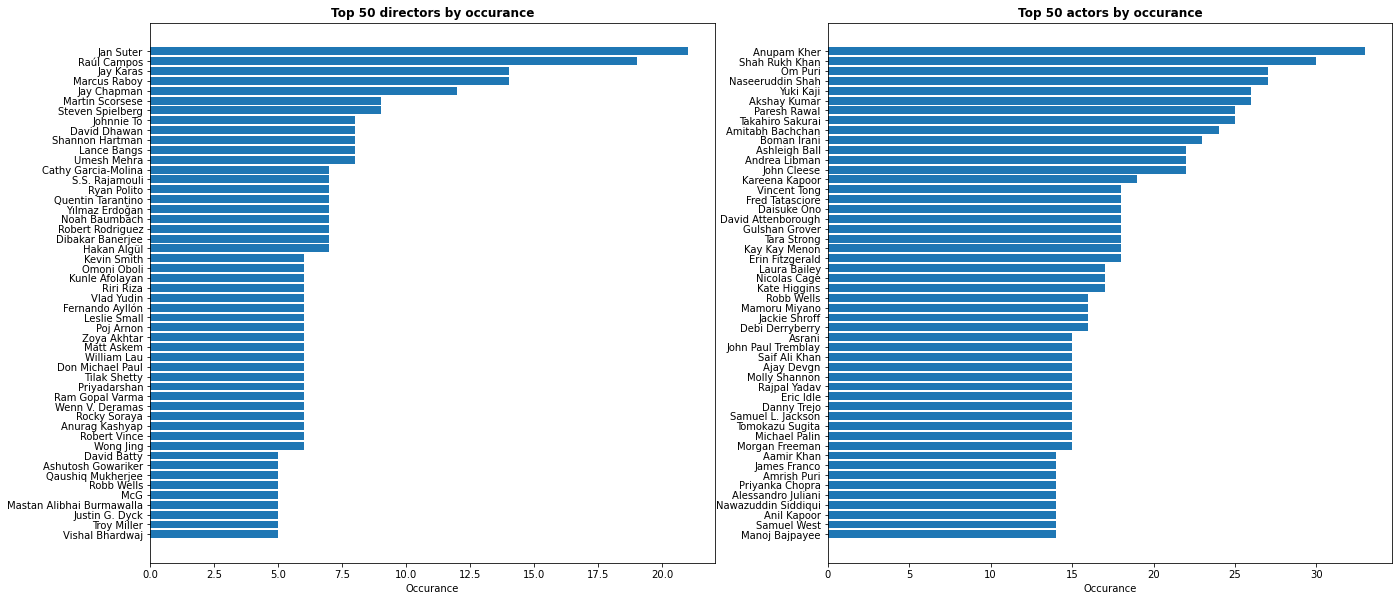

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(right = 3, top = 2)

# Plot comparing the directors who occurs the most.
directorsTop = directorOccurence.iloc[0:50].sort_values()

ax1.set_title('Top 50 directors by occurance', fontweight = 'bold')
ax1.set_xlabel('Occurance')
ax1.barh(width = directorsTop.values, y = directorsTop.keys())

# Plot comparing the actors who occurs the most.
actorsTop = actorOccurence.iloc[0:50].sort_values()

ax2.set_title('Top 50 actors by occurance', fontweight = 'bold')
ax2.set_xlabel('Occurance')
ax2.barh(width = actorsTop.values, y = actorsTop.keys())

fig.show()

In [14]:
# Check if there is any common genres the directors occur in.

# Set to any value between 0 and 50 where 50 is the director with the highest occurance
DIRECTOR_INDEX = 25

director_with_highest_occurance = directorsTop.index[DIRECTOR_INDEX]

movies_series_director_occurs_indexes = []

for col in director.columns:
    movies_series_director_occurs_indexes += director.loc[director[col] == director_with_highest_occurance].index.values.tolist()


genres.iloc[movies_series_director_occurs_indexes]

# We can tell from this that there actually seems to be a really big correlation between director and genres (at least for the top 25) as a director
# keeps making movies/series in the same genres.

,genre1,genre2,genre3
231,Dramas,NaN,NaN
447,Dramas,NaN,NaN
461,Dramas,NaN,NaN
482,Dramas,NaN,NaN
579,Children & Family Movies,Dramas,NaN
4100,Dramas,NaN,Romantic Movies


In [15]:
# Check if there is any common genres the actors occur in.

# Set to any value between 0 and 50 where 50 is the actor with the highest occurance
ACTOR_INDEX = 25

actor_with_highest_occurance = actorsTop.index[ACTOR_INDEX]

movies_series_actor_occurs_indexes = []



for col in cast.columns:
    movies_series_actor_occurs_indexes += cast.loc[cast[col] == actor_with_highest_occurance].index.values.tolist()


genres.iloc[movies_series_actor_occurs_indexes]

# There seems to be some correlation between an actor and genres as well, but not as strong as with the directors. As
# many of the actors do occur in the same genres multiple times, but they also deviate from their "main genre" at times.

,genre1,genre2,genre3
950,Children & Family Movies,NaN,NaN
3139,Kids' TV,TV Comedies,NaN
3669,Children & Family Movies,NaN,NaN
3671,Children & Family Movies,NaN,NaN
780,Children & Family Movies,NaN,NaN
949,Children & Family Movies,NaN,NaN
3672,Children & Family Movies,NaN,NaN
6150,Anime Series,Kids' TV,NaN
3482,Children & Family Movies,NaN,NaN
927,Children & Family Movies,NaN,NaN


#### This relationship between directors and genres, and actors and genres, can be used to predict the genre of a movie based on director and actor, but we got an issue that the number of movies/series an actor/director has been a part of drops of quickly as we can tell from the occurance plots. This means that if we would want to use this information to create a model using machine learning, it could become hard to get a model with high accuracy if what we input to the model doesn't contain any of the directors or actors that has a high occurance, and there isn't particulary many of them.